# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

In [3]:
# Місце для Вашого коду
import numpy as np
from scipy.stats import rv_discrete


def random_value(n):
    space = np.arange(1, 2*n + 1)
    probs = np.log(space)
    k = 1 / sum(probs)
    probs *= k
    log_new = rv_discrete(name = 'log_new', values = (space, probs))
    return log_new


value1 = random_value(10)
value2 = random_value(25)



n = 10
n = 25


### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

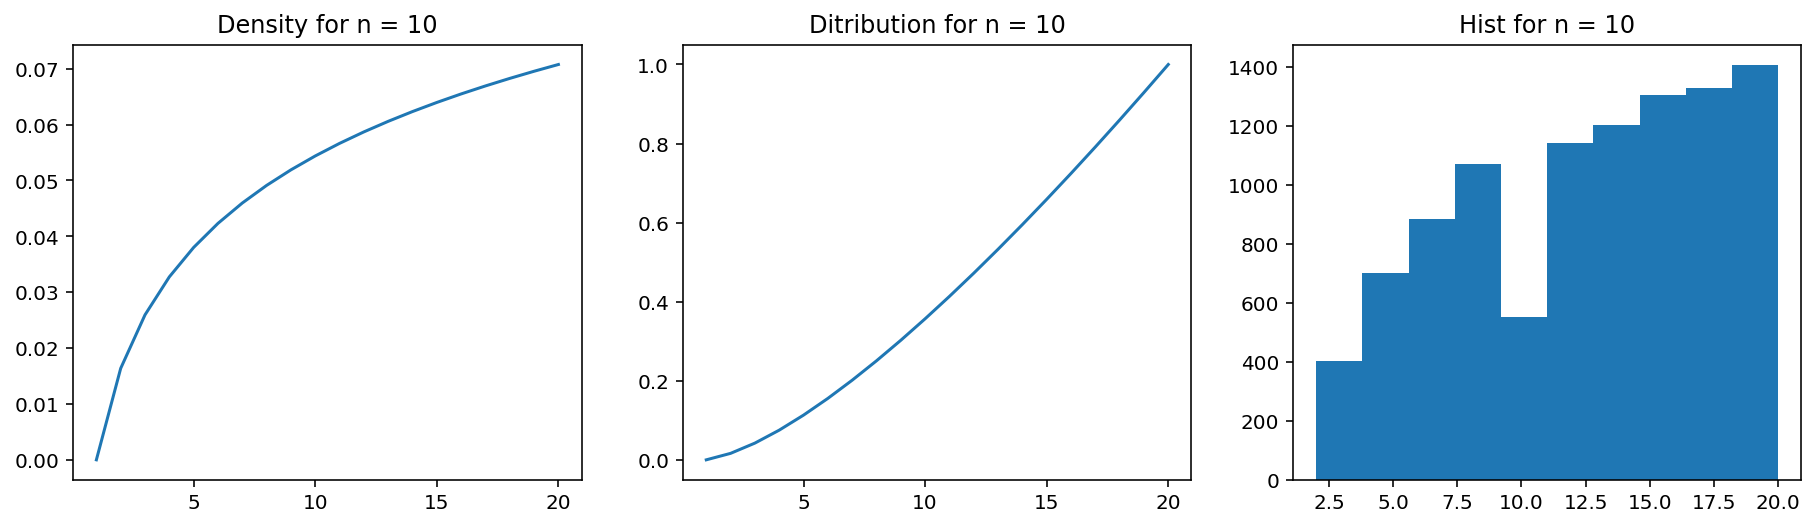

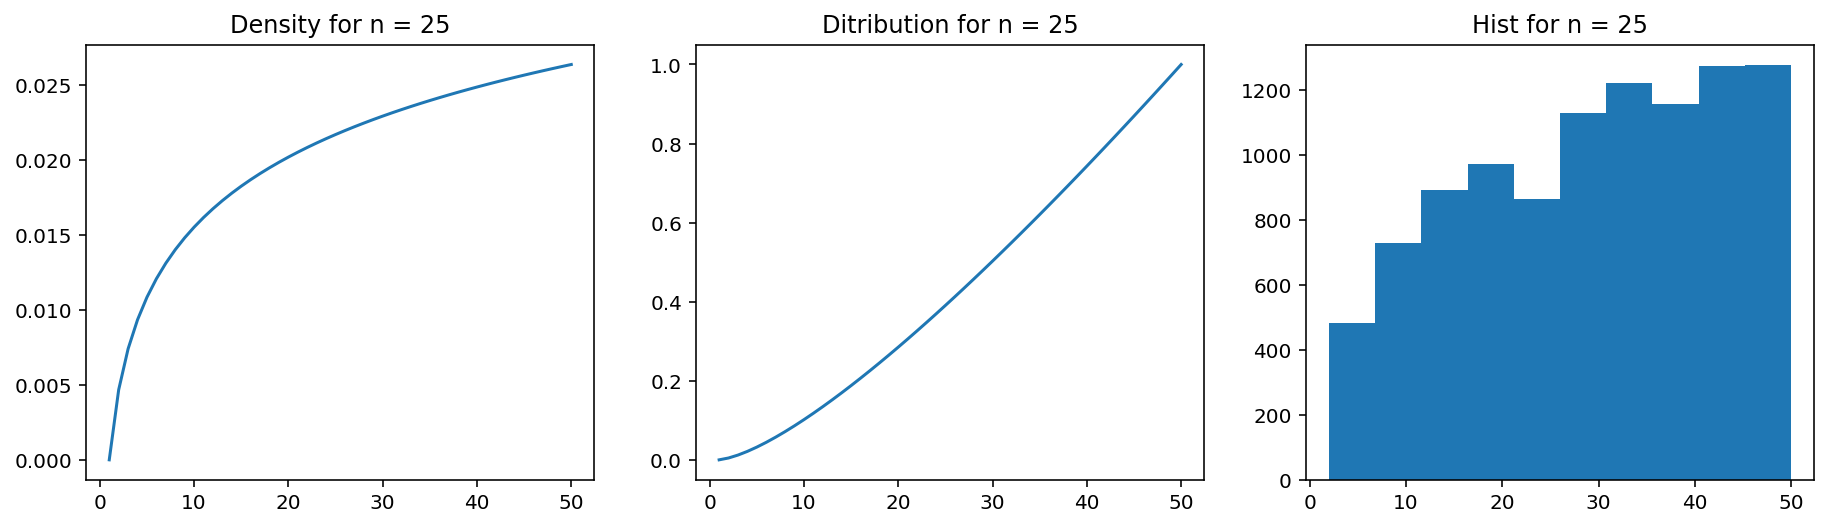

In [5]:
# Місце для Вашого коду
import matplotlib.pyplot as plt

n = 10
space_10 = np.arange(1, 2*n + 1)

plt.subplots_adjust(left=2, right=4)
plt.subplot(1, 3, 1, title=f'Density for n = {n}')
plt.plot(space_10, value1.pmf(space_10))
plt.subplot(1, 3, 2, title=f'Ditribution for n = {n}')
plt.plot(space_10, value1.cdf(space_10))
plt.subplot(1, 3, 3, title=f'Hist for n = {n}')
plt.hist(value1.rvs(size=10000))
plt.show()

n = 25
space_25 = np.arange(1, 2*n + 1)


plt.subplots_adjust(left=2, right=4)
plt.subplot(1, 3, 1, title=f'Density for n = {n}')
plt.plot(space_25, value2.pmf(space_25))
plt.subplot(1, 3, 2, title=f'Ditribution for n = {n}')
plt.plot(space_25, value2.cdf(space_25))
plt.subplot(1, 3, 3, title=f'Hist for n = {n}')
plt.hist(value2.rvs(size=10000))
plt.show()



### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [12]:
# Місце для Вашого коду
def theoretic():
    for n, value in [(10, value1), (25, value2)]:
        odd = np.arange(1, 2*n + 1, 2)
        even = np.arange(2, 2*n + 1, 2)
        print(f'n = {n},odd numbers:', sum(value.pmf(odd)))
        print(f'n = {n},even numbers:', sum(value.pmf(even)))
        print()

theoretic()



n = 10,odd numbers: 0.47949537007207715
n = 10,even numbers: 0.5205046299279227

n = 25,odd numbers: 0.49263592601410955
n = 25,even numbers: 0.5073640739858903



### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [11]:
# Місце для Вашого коду
from collections import Counter

def empirical():
    for n, value in [(10, value1), (25, value2)]:
        odd = np.arange(1, 2*n + 1, 2)
        even = np.arange(2, 2*n + 1, 2)
        exper = Counter(value.rvs(size=1000000))
        res_odd = sum([exper[el] for el in odd])
        res_even = sum([exper[el] for el in even])
        print(f'n = {n}, odd numbers:', res_odd / 1000000)
        print(f'n = {n}, even numbers:', res_even / 1000000)
        print()

empirical()



n = 10, odd numbers: 0.479682
n = 10, even numbers: 0.520318



n = 25, odd numbers: 0.492307
n = 25, even numbers: 0.507693

